In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
import nltk
import string
from string import digits
nltk.download('stopwords')
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\stosc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load datas

In [2]:
# Load stop words from nltk.
nltk_stopwords = set(nltk.corpus.stopwords.words("english")) 

# Load stop words from sklearn.
sklearn_stopwords = set(ENGLISH_STOP_WORDS)

# Load list of non-significative words.
useless = open("C:\\Users\\stosc\\Documents\\ESME\\Ingé2_2019-2020\\S2\\UE1\\Datatools\\Projet\\useless_word.txt", "r")
useless_words = useless.readlines()
for n in range(len(useless_words)):
    useless_words[n] = useless_words[n].rstrip('\n')
    
# Union on all 3 lists "stop_words".
STOP_WORDS = nltk_stopwords.union(sklearn_stopwords)
#STOP_WORDS = nltk_stopwords.union(sklearn_stopwords).union(useless_words)

#print(STOP_WORDS)

In [12]:
# Load data that contains series storylines.
df_storylines = pd.read_csv("C:\\Users\\stosc\\Documents\\ESME\\Ingé2_2019-2020\\S2\\UE1\\DataTools\\Projet\series_storylines.csv",
                      header=0, index_col=0)

df_storylines.describe

<bound method NDFrame.describe of                                              Storyline
1        David Attenborough returns in this breatht...
2        Each 50 minute episode features a global o...
3        This is the story of "E" Easy Company, 506...
4        When chemistry teacher Walter White is dia...
5        In April 1986, a huge explosion erupted at...
..                                                 ...
96       Nathaniel Fisher, his wife Ruth, and their...
97       From the earliest times, the humanity know...
98       The curious, adventure-seeking, fourth gra...
99       At Grace Field House, life couldn't be bet...
100      This is an animated sitcom about the antic...

[100 rows x 1 columns]>

In [4]:
# Create dataframe with top 10 series.

df_top_ten = pd.DataFrame(df_storylines.iloc[0:10,0])

# Clean datas

In [5]:
# Convert all text to lowercase.
df_storylines["Storyline"] = df_storylines["Storyline"].str.lower()

In [6]:
def remove_punctuation(story):
    
    """
    
    Remove the puncutation on a word. For exemple "good." : remove the dot from good.
    
    :param story: the dataframe that contains the storyline text.
    :type story: pandas dataframe.
    :return: storyline without the punctuation on the words.
    :rtype: string.
    
    """
    rem_punct = str.maketrans("","", string.punctuation)
    result = story.translate(rem_punct)
    
    return result

In [7]:
def remove_digits(story):
    
    """
    
    Remove the puncutation on a word. For exemple "good." : remove the dot from good.
    
    :param story: the dataframe that contains the storyline text.
    :type story: pandas dataframe.
    :return: each storyline without digits.
    :rtype: string.
    
    """
    
    remove_digits = str.maketrans("", "", digits)
    result = story.translate(remove_digits)
    
    return result

In [26]:
df_storylines["Storyline"] = df_storylines["Storyline"].apply(remove_punctuation)
df_storylines["Storyline"] = df_storylines["Storyline"].apply(remove_digits)

df_storylines["Storyline"]

1          David Attenborough returns in this breatht...
2          Each  minute episode features a global ove...
3          This is the story of E Easy Company th Reg...
4          When chemistry teacher Walter White is dia...
5          In April  a huge explosion erupted at the ...
                             ...                        
96         Nathaniel Fisher his wife Ruth and their c...
97         From the earliest times the humanity knows...
98         The curious adventureseeking fourth grade ...
99         At Grace Field House life couldnt be bette...
100        This is an animated sitcom about the antic...
Name: Storyline, Length: 100, dtype: object

# Analysis

CountVectorizer

First analysis : find words that have high fequency amongs storyline from all first 100 series of the imdb classement.

In [16]:
cv = CountVectorizer(stop_words = STOP_WORDS, ngram_range=(1,1), max_features=2000)

In [17]:
# Apply CV on train data

cv.fit(df_storylines["Storyline"])

cv_transform = cv.transform(df_storylines["Storyline"])

new_df_storylines = pd.DataFrame(cv_transform.toarray(), columns=cv.get_feature_names())

new_df_storylines.describe()    


,10,100,101st,12,13,14,18,1917,1920s,1942,...,yogi,yom,york,yorkshire,young,younger,ytv,zabijaniu,zoe,zone
count,100.000000,100.000000,100.00,100.00,100.00,100.00,100.00,100.00,100.000000,100.00,...,100.00,100.00,100.000000,100.00,100.000000,100.000000,100.00,100.00,100.00,100.00
mean,0.030000,0.020000,0.01,0.01,0.01,0.01,0.01,0.01,0.030000,0.01,...,0.01,0.01,0.040000,0.05,0.100000,0.030000,0.01,0.01,0.02,0.02
std,0.171447,0.140705,0.10,0.10,0.10,0.10,0.10,0.10,0.171447,0.10,...,0.10,0.10,0.242878,0.50,0.301511,0.171447,0.10,0.10,0.20,0.20
min,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00
25%,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00
50%,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00
75%,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.00,...,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00
max,1.000000,1.000000,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1.00,...,1.00,1.00,2.000000,5.00,1.000000,1.000000,1.00,1.00,2.00,2.00


In [18]:
word_frequency = new_df_storylines.sum(axis=0).sort_values(ascending=False)
#print(word_frequency)

Text(0, 0.5, 'Words')

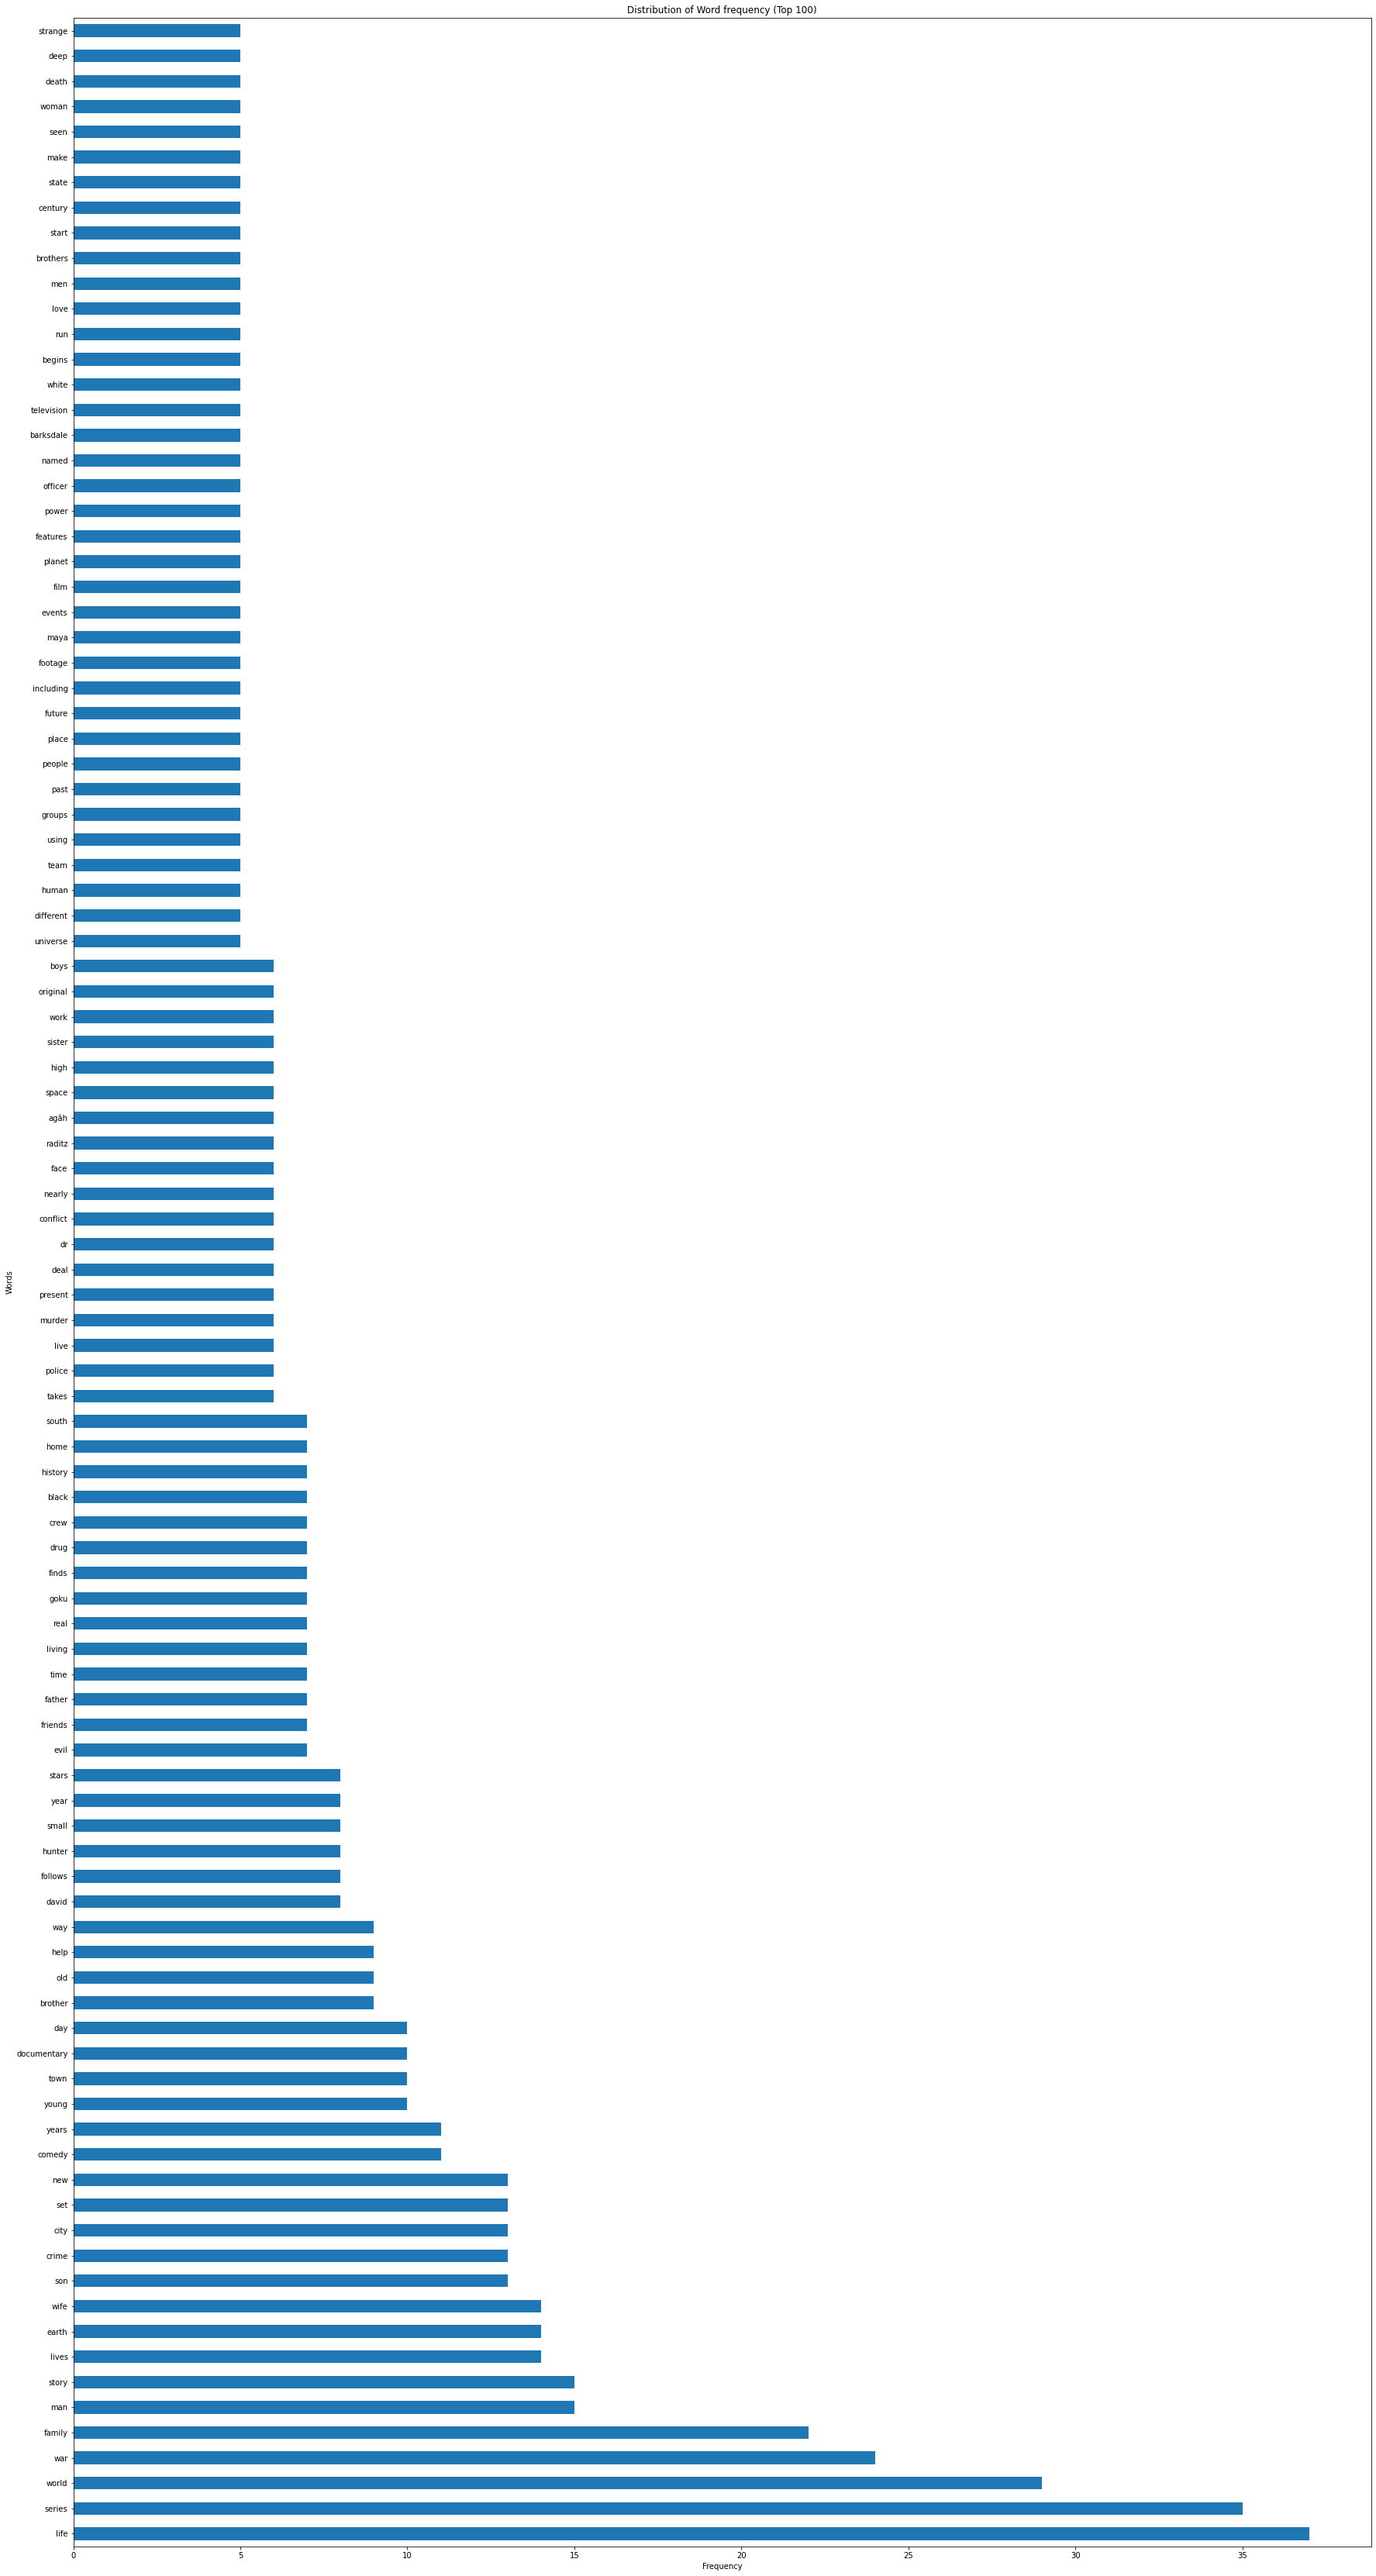

In [25]:
plt.figure(figsize=(30, 60))
word_frequency[:100].plot.barh()
plt.title("Distribution of Word frequency (Top 100)")
plt.xlabel("Frequency")
plt.ylabel("Words")
#plt.show()

TF-IDF

Count not frequent words of the top 10 serie : why the serie is original ?

In [16]:
from  sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
tfidf = TfidfVectorizer(lowercase=True, 
                         stop_words=STOP_WORDS, 
                         ngram_range=(1,1), 
                         max_features=2000)

In [22]:
# Transformer la liste des documents en matrice eparse : tableau de fréquence
csr_mat = tfidf.fit_transform(df_top_ten["Storyline"])
#csr_mat.toarray()

words = tfidf.get_feature_names()

df_tfidf = pd.DataFrame(index=df_top_ten["Storyline"], data=csr_mat.toarray(), columns=words)
df_tfidf

,101st,1942,1986,50,506th,acclaimed,accompanied,action,affects,africa,...,white,wife,wilderness,women,working,world,worlds,worse,years,yeti
Storyline,,,,,,,,,,,,,,,,,,,,,
David Attenborough returns in this breathtaking documentary showcasing life on Planet Earth.,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Each 50 minute episode features a global overview of a different biome or habitat on Earth (Polar, Mountain, Cave, Desert, Plains, Fresh Water, Seas, Ocean, Forest), followed by a ten-minute featurette which takes a behind-the-scenes look at the challenges of filming the episode.",0.00000,0.00000,0.000000,0.177855,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"This is the story of ""E"" Easy Company, 506th Regiment of the 101st Airborne Division from their initial training starting in 1942 to the end of World War II. They parachuted behind enemy lines in the early hours of D-Day in support of the landings at Utah beach, participated in the liberation of Carentan and again parachuted into action during Operation Market Garden. They also liberated a concentration camp and were the first to enter Hitler's mountain retreat in Berchtesgaden. A fascinating tale of comradeship that is, in the end, a tale of ordinary men who did extraordinary things.",0.13475,0.13475,0.000000,0.000000,0.13475,0.000000,0.000000,0.13475,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.080017,0.000000,0.000000,0.000000,0.000000
"When chemistry teacher Walter White is diagnosed with Stage III cancer and given only two years to live, he decides he has nothing to lose. He lives with his teenage son, who has cerebral palsy, and his wife, in New Mexico. Determined to ensure that his family will have a secure future, Walt embarks on a career of drugs and crime. He proves to be remarkably proficient in this new world as he begins manufacturing and selling methamphetamine with one of his former students. The series tracks the impacts of a fatal diagnosis on a regular, hard working man, and explores how a fatal diagnosis affects his morality and transforms him into a major player of the drug trade.",0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.127244,0.000000,...,0.127244,0.127244,0.000000,0.000000,0.127244,0.075560,0.000000,0.000000,0.127244,0.000000
"In April 1986, a huge explosion erupted at the Chernobyl nuclear power station in northern Ukraine. This series follows the stories of the men and women, who tried to contain the disaster, as well as those who gave their lives preventing a subsequent and worse one.",0.00000,0.00000,0.211011,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.211011,0.000000,0.000000,0.000000,0.211011,0.000000,0.000000
"Set in Baltimore, this show centers around the city's inner-city drug scene. It starts as mid-level drug dealer, D'Angelo Barksdale beats a murder rap. After a conversation with a judge, Det. James McNulty has been assigned to lead a joint homicide and narcotics team, in order to bring down drug kingpin Avon Barksdale. Avon Barksdale, accompanied by his right-hand man Stringer Bell, enforcer Wee-Bey and many lieutenants (including his own nephew, D'Angelo Barksdale), has to deal with law enforcement, informants in his own camp, and competition with a local rival, Omar, who's been robbing Barksdale's dealers and reselling the drugs. The supervisor of the investigation, Lt. Cedric Daniels, has to deal with his own problems, such as a corrupt bureaucracy, some of his detectives beating suspects, hard-headed but determined Det. McNulty, and a blackmailing deputy. The show depicts the lives of every part of the drug ""food chain"", from junkies to dealers, and from cops to politicians.",0.00000,0.00000

In [23]:
#Affiche les mots utiles : qui ne sont pas présents dans tous les documents mais présent dans un un seul et apporte une différence
inverse_document_freq = pd.DataFrame({"idf":tfidf.idf_}, 
                                     index=tfidf.get_feature_names())
inverse_document_freq = inverse_document_freq.sort_values(by="idf", ascending=False)

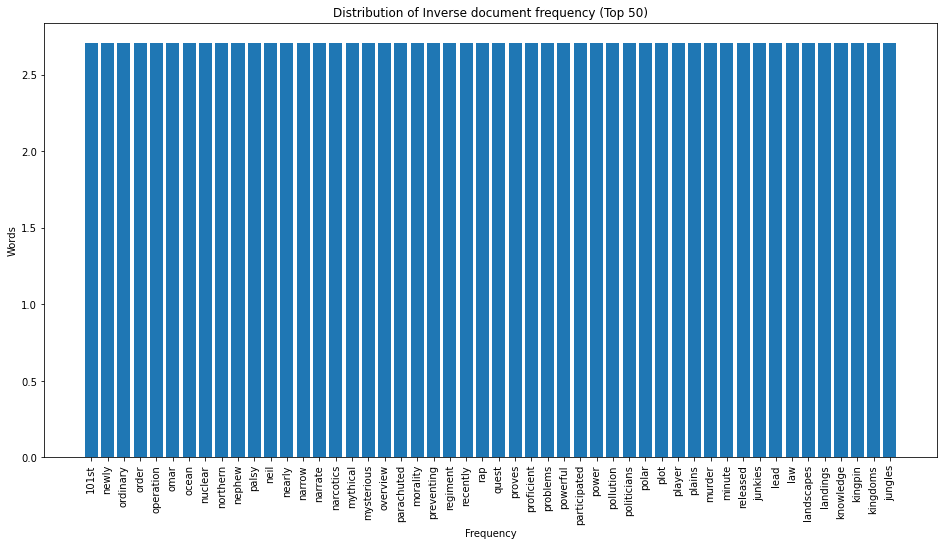

In [24]:
plt.figure(figsize=(16, 8))
plt.title("Distribution of Inverse document frequency (Top 50)")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.bar(height=inverse_document_freq[:50]['idf'], 
        x=inverse_document_freq[:50].index)
plt.xticks(rotation=90)
plt.show()